In [47]:
%matplotlib inline

In [1]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/mirichoi0218/insurance'
od.download(dataset_url)

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [2]:
import pandas as pd
import json
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
df = pd.read_csv(r'insurance/insurance.csv')

In [4]:
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [5]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
X = pd.get_dummies(data=X, drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


# Split and Scale Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

[39.234375   30.54261719  1.09933036  0.51227679  0.20982143]


# Linear Regression

In [80]:
regression = LinearRegression().fit(X_train_scaled, y_train)

In [81]:
regression.score(X_test_scaled, y_test)

0.7587422388407032

In [82]:
import matplotlib.pyplot as plt

In [83]:
diabetes_y_pred = regression.predict(X_test_scaled)

Text(0, 0.5, 'Insurance charge prediction')

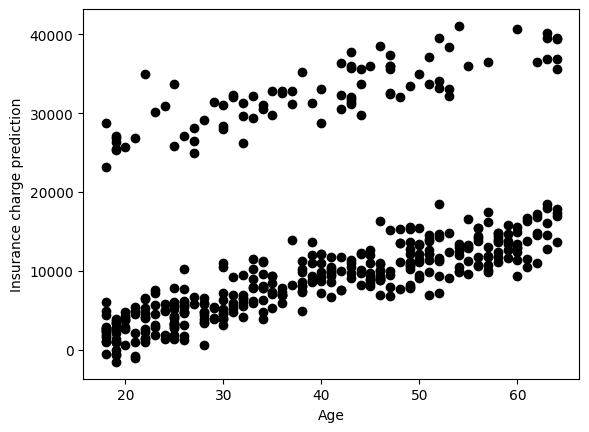

In [86]:
plt.scatter(X_test['age'], diabetes_y_pred, color="black")
plt.plot(X_test['age'], diabetes_y_pred, color="blue", linewidth=0)
plt.xlabel("Age")
plt.ylabel("Insurance charge prediction")

# Polynomial Regression

In [48]:
poly = PolynomialFeatures(2)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [49]:
regression = LinearRegression().fit(X_train_scaled_poly, y_train)

In [50]:
regression.score(X_test_scaled_poly, y_test)

0.8526744116623971

# Neural Network

In [12]:
from sklearn.neural_network import MLPRegressor

In [13]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10),
                       max_iter = 40000,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=40000)

<!-- 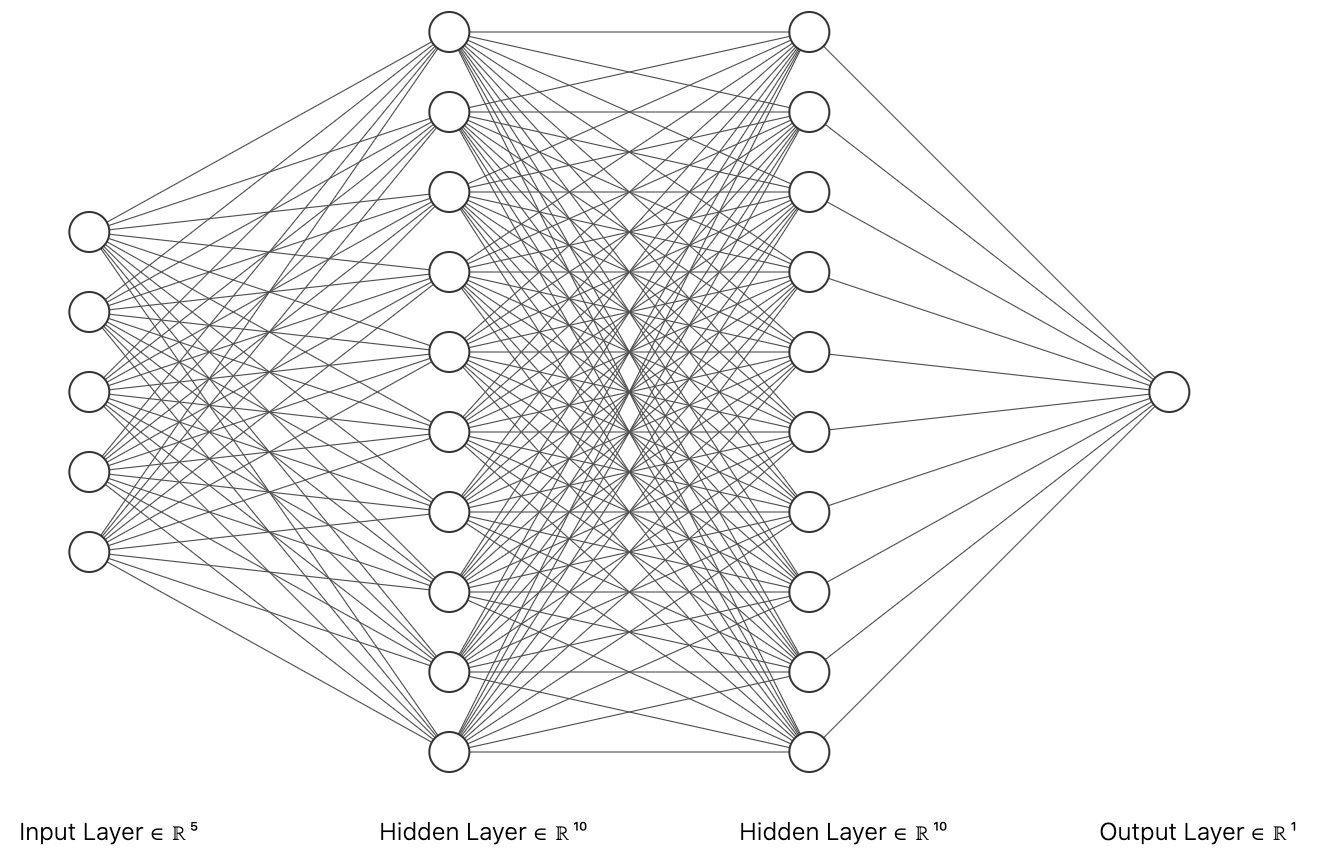 -->
<div>
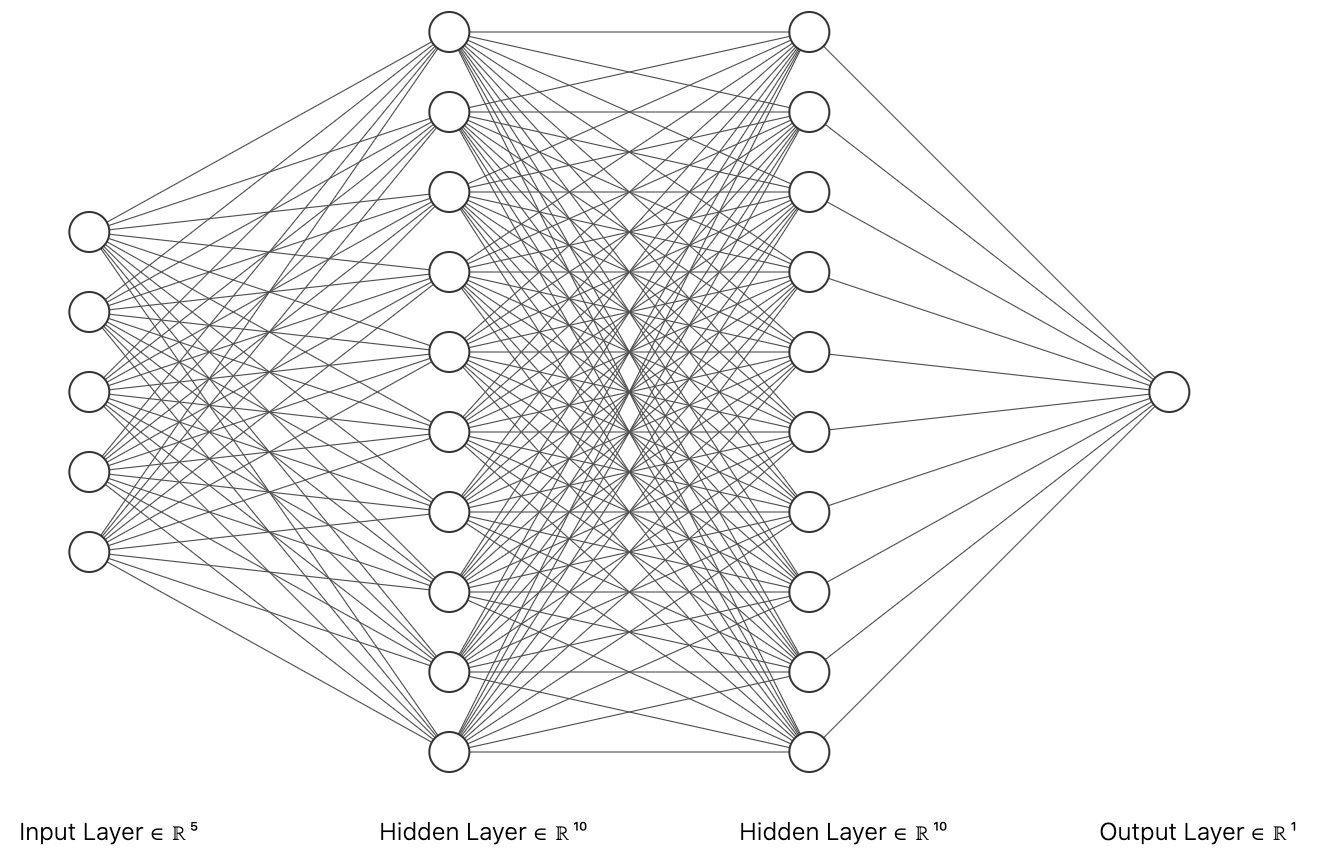
</div>

In [14]:
mlp_reg.score(X_test_scaled, y_test)

0.8548457454796526

# Stacking

In [15]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
estimators = [
     ('lr', LinearRegression()),
     ('mlp', MLPRegressor(hidden_layer_sizes=(10,10),
                       max_iter = 40000,activation = 'relu',
                       solver = 'adam'))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=MLPRegressor(hidden_layer_sizes=(5,5),
                       max_iter = 40000,activation = 'relu',
                       solver = 'adam'))

In [17]:
reg.fit(X_train_scaled_poly, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('mlp',
                               MLPRegressor(hidden_layer_sizes=(10, 10),
                                            max_iter=40000))],
                  final_estimator=MLPRegressor(hidden_layer_sizes=(5, 5),
                                               max_iter=40000))

In [18]:
reg.score(X_test_scaled_poly, y_test)

0.8528670440579817